In [1]:
import rdkit.Chem as rkc
from rdkit.Chem import Crippen
from rdkit.Chem import Lipinski
from rdkit.Chem import Descriptors, QED
from rdkit.Chem.QED import properties
import SA_Score.sascorer as sa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = r'D:\Research\A2B\a2b_lower_100nm.smi'    #read *.smi file
with open(filename,'r+') as load_smi:
    smi_li = load_smi.read().split('\n')

mols = [rkc.MolFromSmiles(smi) for smi in smi_li]

In [3]:
filename_2 = r'D:\Research\A2B\Molecules\benzyl_sca\overall_gene.smi'    #read *.smi file
with open(filename_2,'r+') as load_smi:
    smi_li2 = load_smi.read().split('\n')

mols_2 = [rkc.MolFromSmiles(smi) for smi in smi_li2]

In [5]:
def QED_calculation(mol): #Calculate for QED score
    return QED.default(mol)

def SAscore_calculation(mol): #Calculate for SA score
    try:
        return sa.calculateScore(mol)
    except ZeroDivisionError:
            pass
        
def Lipinski_judgment(mol): #Lipinski's Rule 
    num_hdonors = Lipinski.NumHDonors(mol)
    num_hacceptors = Lipinski.NumHAcceptors(mol)
    num_rotatable = Lipinski.NumRotatableBonds(mol)
    mol_weight = Descriptors.MolWt(mol)
    mol_logp = Crippen.MolLogP(mol)
    mol_TPSA = Descriptors.TPSA(mol)
    if num_hdonors < 5 and num_hacceptors > 4 and mol_weight > 250 and mol_logp > 1.5 and mol_TPSA >50 and mol_TPSA < 120:
        return 'Y'
    else:
        return 'N'

In [68]:
qed_value_train,qed_value_gene = [QED_calculation(mol) for mol in mols],[QED_calculation(mol) for mol in mols_2]
sa_value_train,sa_value_gene = [SAscore_calculation(mol) for mol in mols],[SAscore_calculation(mol) for mol in mols_2]

In [69]:
MW_train,MW_gene = [Descriptors.MolWt(mol) for mol in mols], [Descriptors.MolWt(mol) for mol in mols_2]
cLgP_train,cLgP_gene = [Crippen.MolLogP(mol) for mol in mols], [Crippen.MolLogP(mol) for mol in mols_2]

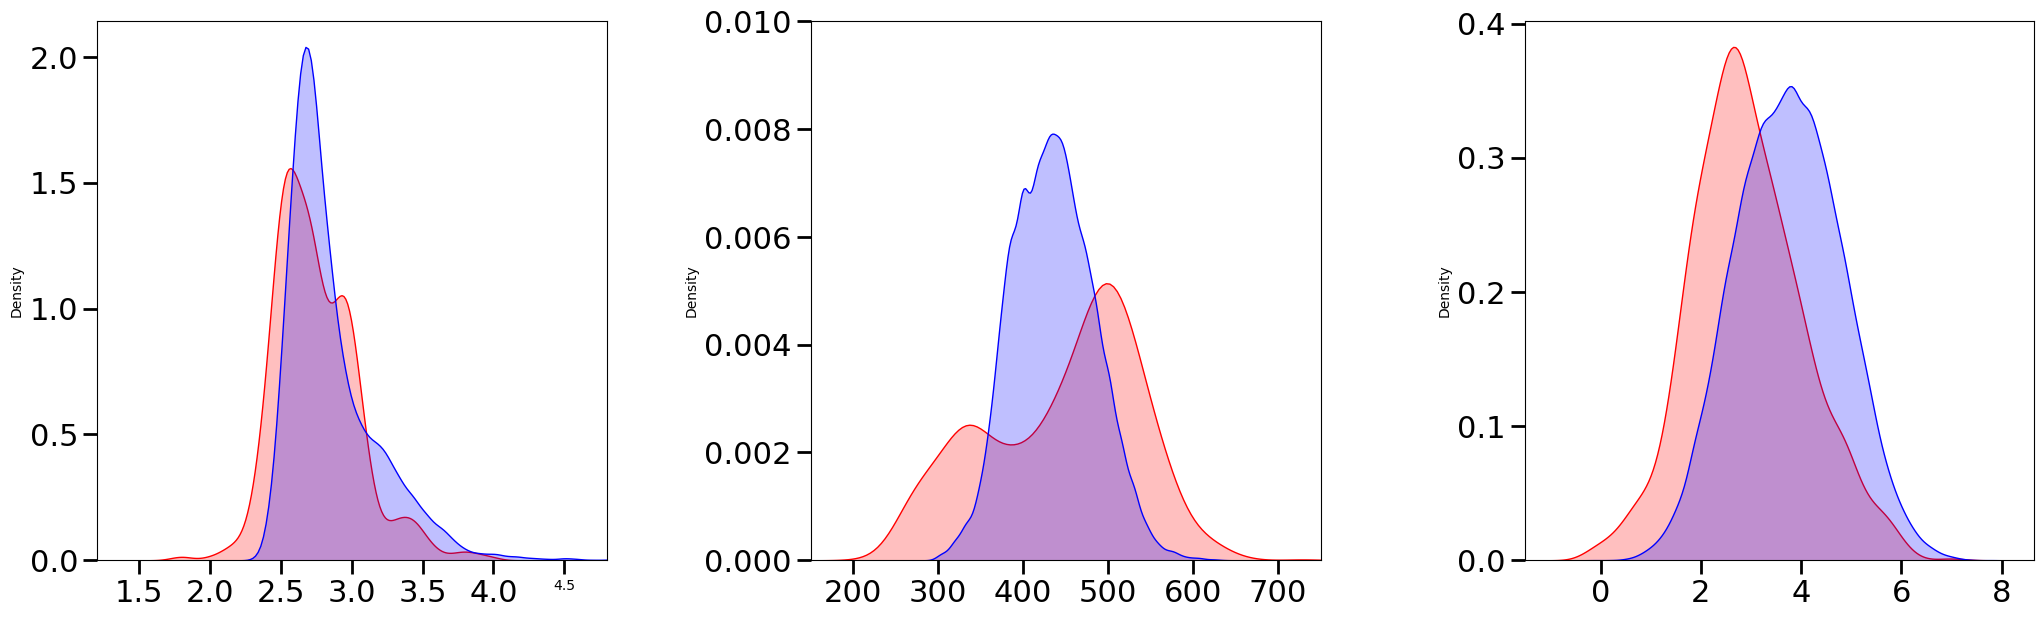

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,3,1)
sns.kdeplot(data=sa_value_train, color='r', fill=True)
sns.kdeplot(data=sa_value_gene, color='b', fill=True)
plt.yticks(np.arange(0, 2.5, 0.5),fontsize=22)
plt.xticks(fontsize=22)
plt.xlim(1.2, 4.8)
plt.tick_params(width=2,length=10)


plt.subplot(1,3,2)
sns.kdeplot(data=MW_train, color='r', fill=True)
sns.kdeplot(data=MW_gene, color='b', fill=True)
plt.yticks(np.arange(0, 0.012, 0.002),fontsize=22)
plt.xticks(fontsize=22)
plt.xlim(150, 750)
plt.tick_params(width=2,length=10)

plt.subplot(1,3,3)
sns.kdeplot(data=cLgP_train, color='r', fill=True)
sns.kdeplot(data=cLgP_gene, color='b', fill=True)
plt.yticks(np.arange(0, 0.5, 0.1),fontsize=22)
plt.xticks(fontsize=22)
plt.tick_params(width=2,length=10)

plt.show()
fig.savefig("para.svg",dpi=2000)

In [71]:
filename_3 = r'D:\Research\A2B\Molecules\benzyl_meta\gene_benzyl_meta.smi'    #read *.smi file
with open(filename_3,'r+') as load_smi:
    smi_li3 = load_smi.read().split('\n')

mols_3 = [rkc.MolFromSmiles(smi) for smi in smi_li3]

sa_value_train,sa_value_gene = [SAscore_calculation(mol) for mol in mols],[SAscore_calculation(mol) for mol in mols_3]
MW_train,MW_gene = [Descriptors.MolWt(mol) for mol in mols], [Descriptors.MolWt(mol) for mol in mols_3]
cLgP_train,cLgP_gene = [Crippen.MolLogP(mol) for mol in mols], [Crippen.MolLogP(mol) for mol in mols_3]

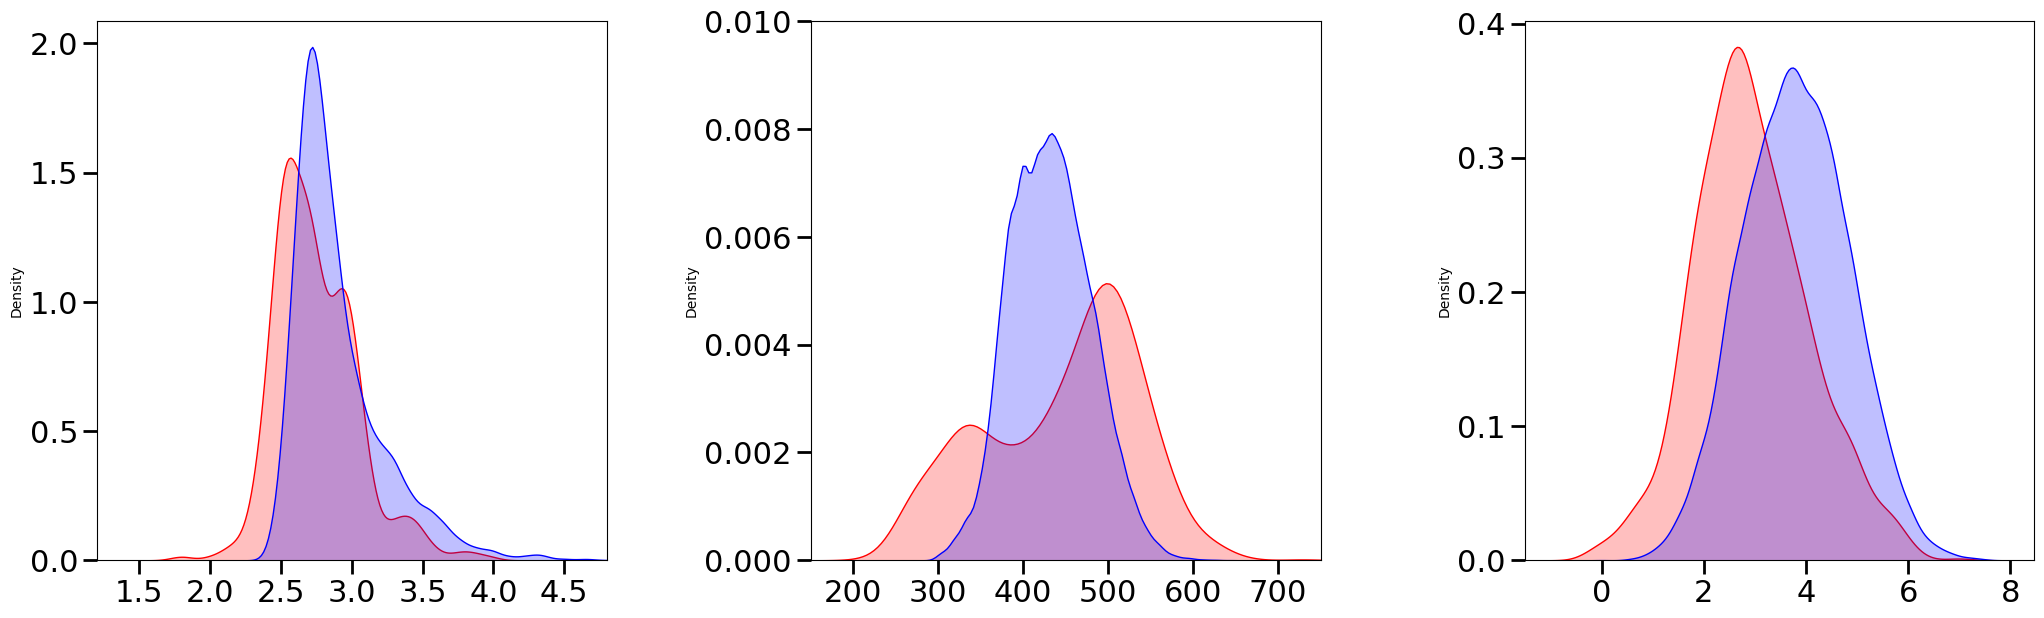

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,3,1)
sns.kdeplot(data=sa_value_train, color='r', fill=True)
sns.kdeplot(data=sa_value_gene, color='b', fill=True)
plt.yticks(np.arange(0, 2.5, 0.5),fontsize=22)
plt.xticks(fontsize=22)
plt.xlim(1.2, 4.8)
plt.tick_params(width=2,length=10)

plt.subplot(1,3,2)
sns.kdeplot(data=MW_train, color='r', fill=True)
sns.kdeplot(data=MW_gene, color='b', fill=True)
plt.yticks(np.arange(0, 0.012, 0.002),fontsize=22)
plt.xticks(fontsize=22)
plt.xlim(150, 750)
plt.tick_params(width=2,length=10)

plt.subplot(1,3,3)
sns.kdeplot(data=cLgP_train, color='r', fill=True)
sns.kdeplot(data=cLgP_gene, color='b', fill=True)
plt.yticks(np.arange(0, 0.5, 0.1),fontsize=22)
plt.xticks(fontsize=22)
plt.tick_params(width=2,length=10)

plt.show()
fig.savefig("mata.svg",dpi=2000)

In [6]:
filename_4 = r'D:\Research\A2B\Molecules\sca_amide\gene_amide.smi'    #read *.smi file
with open(filename_4,'r+') as load_smi:
    smi_li4 = load_smi.read().split('\n')

mols_4 = [rkc.MolFromSmiles(smi) for smi in smi_li4]

sa_value_train,sa_value_gene = [SAscore_calculation(mol) for mol in mols],[SAscore_calculation(mol) for mol in mols_4]
MW_train,MW_gene = [Descriptors.MolWt(mol) for mol in mols], [Descriptors.MolWt(mol) for mol in mols_4]
cLgP_train,cLgP_gene = [Crippen.MolLogP(mol) for mol in mols], [Crippen.MolLogP(mol) for mol in mols_4]

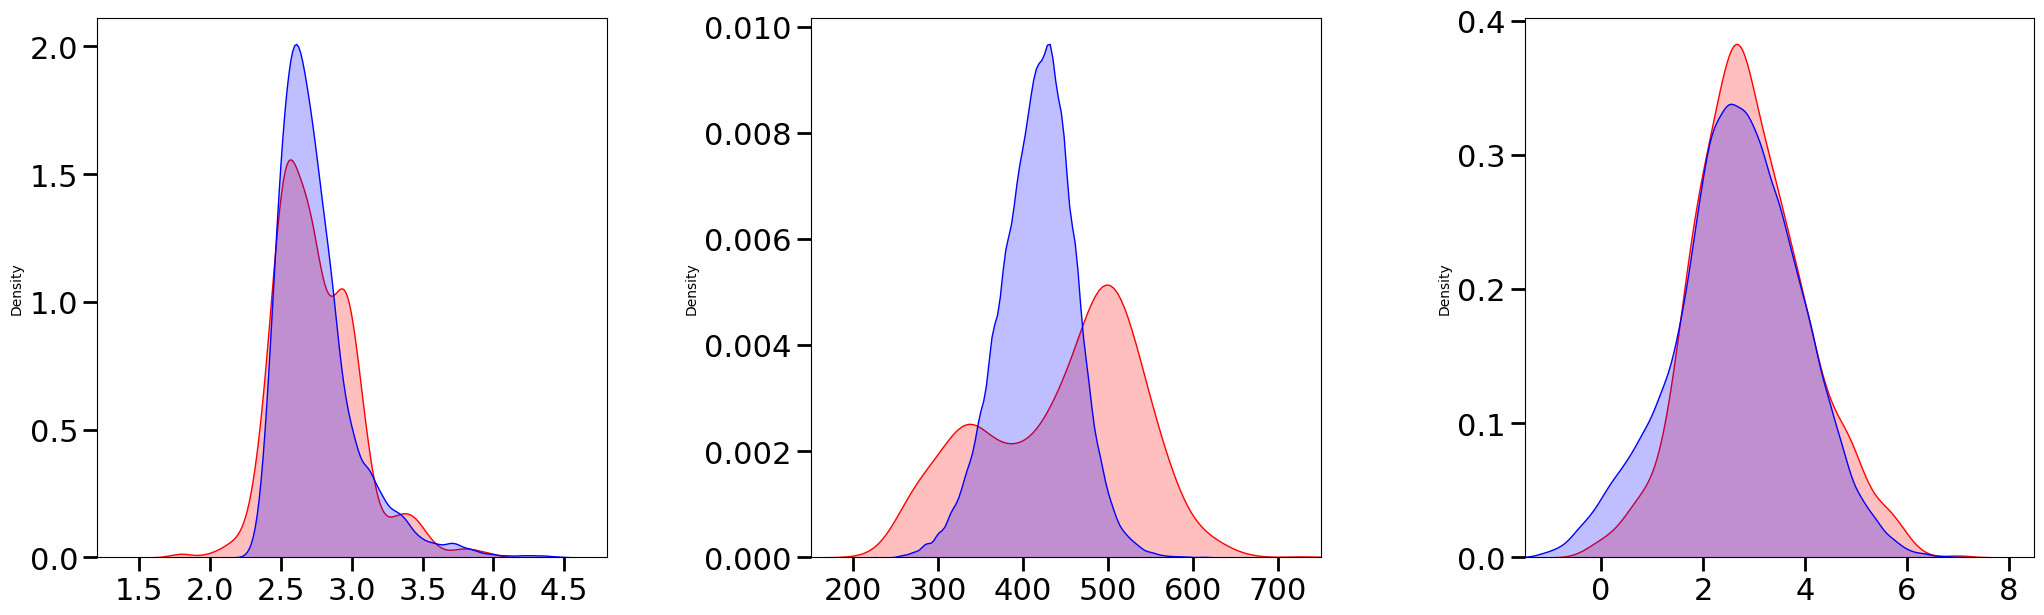

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(25,7))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1,3,1)
sns.kdeplot(data=sa_value_train, color='r', fill=True)
sns.kdeplot(data=sa_value_gene, color='b', fill=True)
plt.yticks(np.arange(0, 2.5, 0.5),fontsize=22)
plt.xticks(fontsize=22)
plt.xlim(1.2, 4.8)
plt.tick_params(width=2,length=10)

plt.subplot(1,3,2)
sns.kdeplot(data=MW_train, color='r', fill=True)
sns.kdeplot(data=MW_gene, color='b', fill=True)
plt.yticks(np.arange(0, 0.012, 0.002),fontsize=22)
plt.xticks(fontsize=22)
plt.xlim(150, 750)
plt.tick_params(width=2,length=10)

plt.subplot(1,3,3)
sns.kdeplot(data=cLgP_train, color='r', fill=True)
sns.kdeplot(data=cLgP_gene, color='b', fill=True)
plt.yticks(np.arange(0, 0.5, 0.1),fontsize=22)
plt.xticks(fontsize=22)
plt.tick_params(width=2,length=10)
plt.xlim(-1.5,8.5)

plt.show()
fig.savefig("amide.svg",dpi=2000)